# Task 2:Image Classification

## Name: [Your name]


## Image Classification

### 1. Machine Learning

### **Classifier: Support Vector Machine (SVM)**

### **Description: Why SVM was Chosen?**  

For this image classification task, we selected **Support Vector Machine (SVM)** as our classifier due to its strong ability to handle high-dimensional data, even with a relatively small dataset. SVM is particularly effective for image classification when using **flattened pixel values** as features, making it a good choice for traditional machine learning approaches.

Unlike deep learning models that require extensive computational power and large datasets, SVM works well on **moderate-sized datasets** while maintaining high classification accuracy. The **linear kernel** is used to ensure computational efficiency, while the ability to separate classes using a **maximum-margin hyperplane** helps improve classification performance.

Additionally, SVM provides a good **trade-off between interpretability and accuracy** compared to deep learning models. By using **standardized features**, we improve the model's ability to generalize to unseen images. Overall, SVM is a strong baseline model for image classification before moving to more complex architectures like Convolutional Neural Networks (CNNs).


GPU is available and used for preprocessing.
SVM Model Accuracy: 0.4516
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.43      0.45        21
           1       0.35      0.29      0.32        21
           2       0.50      0.65      0.57        20

    accuracy                           0.45        62
   macro avg       0.44      0.45      0.44        62
weighted avg       0.44      0.45      0.44        62



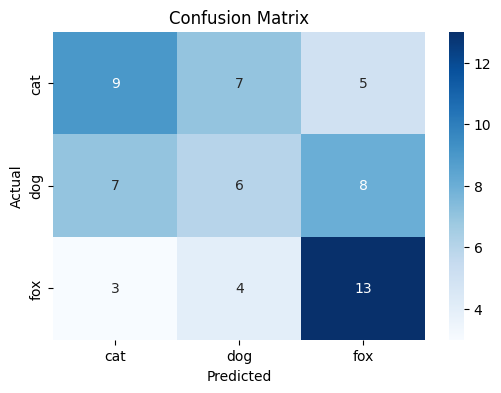

['ml_model(1).pkl']

In [7]:
import numpy as np
import pandas as pd
import os
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

# Enable GPU for preprocessing
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU is available and used for preprocessing.")
else:
    print("GPU not found, preprocessing on CPU.")

# Load and preprocess images using TensorFlow
def load_images(data_dir, img_size=(128, 128)):
    images, labels = [], []
    categories = os.listdir(data_dir)
    for category in categories:
        folder_path = os.path.join(data_dir, category)
        if os.path.isdir(folder_path):
            for img_name in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_name)
                img = load_img(img_path, target_size=img_size)
                img_array = img_to_array(img) / 255.0  # Normalize
                images.append(img_array.flatten())  # Flatten for ML models
                labels.append(category)
    return np.array(images), np.array(labels)

# Load dataset
data_dir = "/kaggle/input/dataset-task-02/Task_02_dataset"
X, y = load_images(data_dir)

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Normalize the pixel values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a classifier (SVM) on CPU
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM Model Accuracy: {accuracy:.4f}")
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Save the trained model
import joblib
joblib.dump(svm_model, "ml_model(1).pkl")


### 2. Pre-trained model
#### Model Name: MobileNetV2
#### Reason for Selection:
- MobileNetV2 is optimized for mobile and embedded vision applications.
- It offers a high accuracy-to-computation ratio, making it efficient for image classification tasks.
- Transfer learning allows leveraging pre-trained features from ImageNet, reducing training time and improving performance.


GPU is available and will be used.
Found 248 images belonging to 3 classes.
Found 61 images belonging to 3 classes.
Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - categorical_accuracy: 0.5563 - loss: 0.9790 - val_categorical_accuracy: 0.9180 - val_loss: 0.2666
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 60s 336ms/step - categorical_accuracy: 0.9582 - loss: 0.1293 - val_categorical_accuracy: 0.9344 - val_loss: 0.1702
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 66s 385ms/step - categorical_accuracy: 0.9881 - loss: 0.0454 - val_categorical_accuracy: 0.9508 - val_loss: 0.1075
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 60s 329ms/step - categorical_accuracy: 1.0000 - loss: 0.0105 - val_categorical_accuracy: 0.9508 - val_loss: 0.1239
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 71s 343ms/step - categorical_accuracy: 1.0000 - loss: 0.0048 - val_categorical_accuracy: 0.9508 - val_loss: 0.1406
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 60s 332ms/step - categorical_accuracy: 1.0000 - loss: 0.0040 - val_categorical_accuracy: 0.9508 

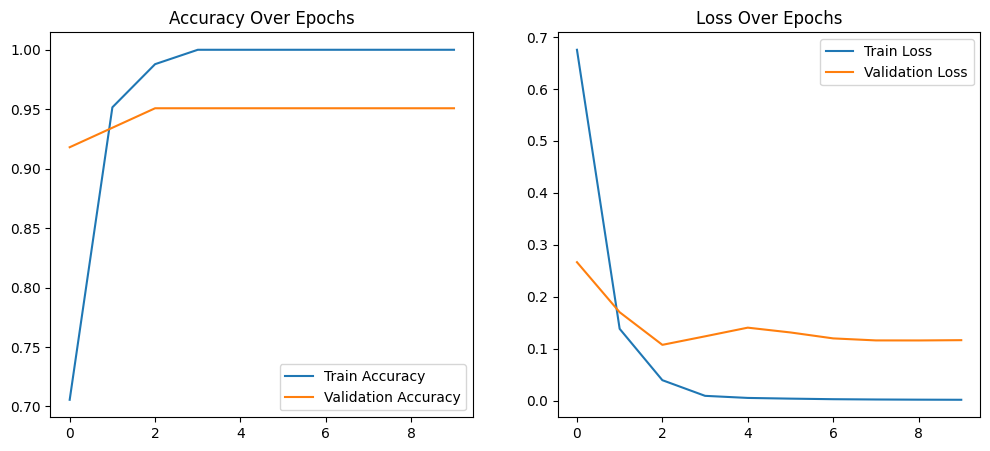

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import numpy as np
import os

# Enable GPU usage
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)
    print("GPU is available and will be used.")
else:
    print("GPU not found, running on CPU.")

# Define dataset directory
data_dir = "/kaggle/input/dataset-task-02/Task_02_dataset"

# Data Preprocessing
img_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    data_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', subset='training')

val_generator = datagen.flow_from_directory(
    data_dir, target_size=img_size, batch_size=batch_size, class_mode='categorical', subset='validation')

# Load Pretrained Model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False  # Freeze base model layers

# Add Custom Layers
global_avg_pool = GlobalAveragePooling2D()(base_model.output)
dense_layer = Dense(128, activation='relu')(global_avg_pool)
output_layer = Dense(3, activation='softmax')(dense_layer)

model = Model(inputs=base_model.input, outputs=output_layer)

# Compile Model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Train Model
epochs = 10
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs)

# Plot Accuracy and Loss
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['categorical_accuracy'], label='Train Accuracy')
plt.plot(history.history['val_categorical_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.legend()
plt.show()

# Save the best model
model.save("final_model.keras")  # Recommended


## 4. Test on new data

You can use any of your models developed above that should give the best results.

Model loaded successfully.
Unique Labels Found: ['dog' 'fox' 'cat']
Found 15 validated image filenames belonging to 3 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
Test Accuracy: 1.0000
Predictions with actual labels saved to test_predictions_with_labels.csv


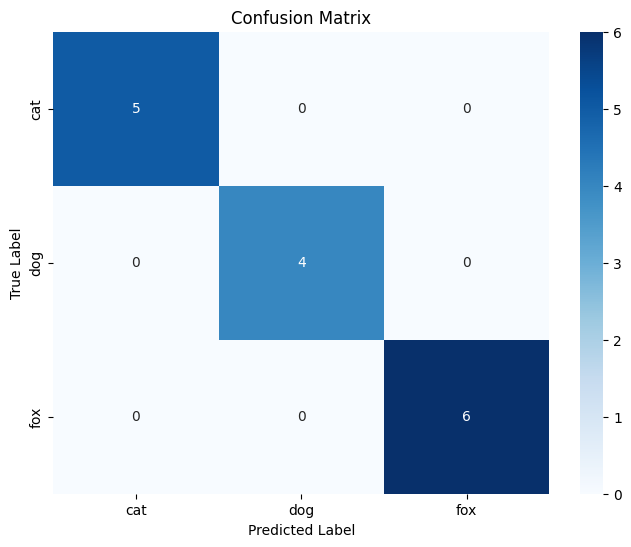

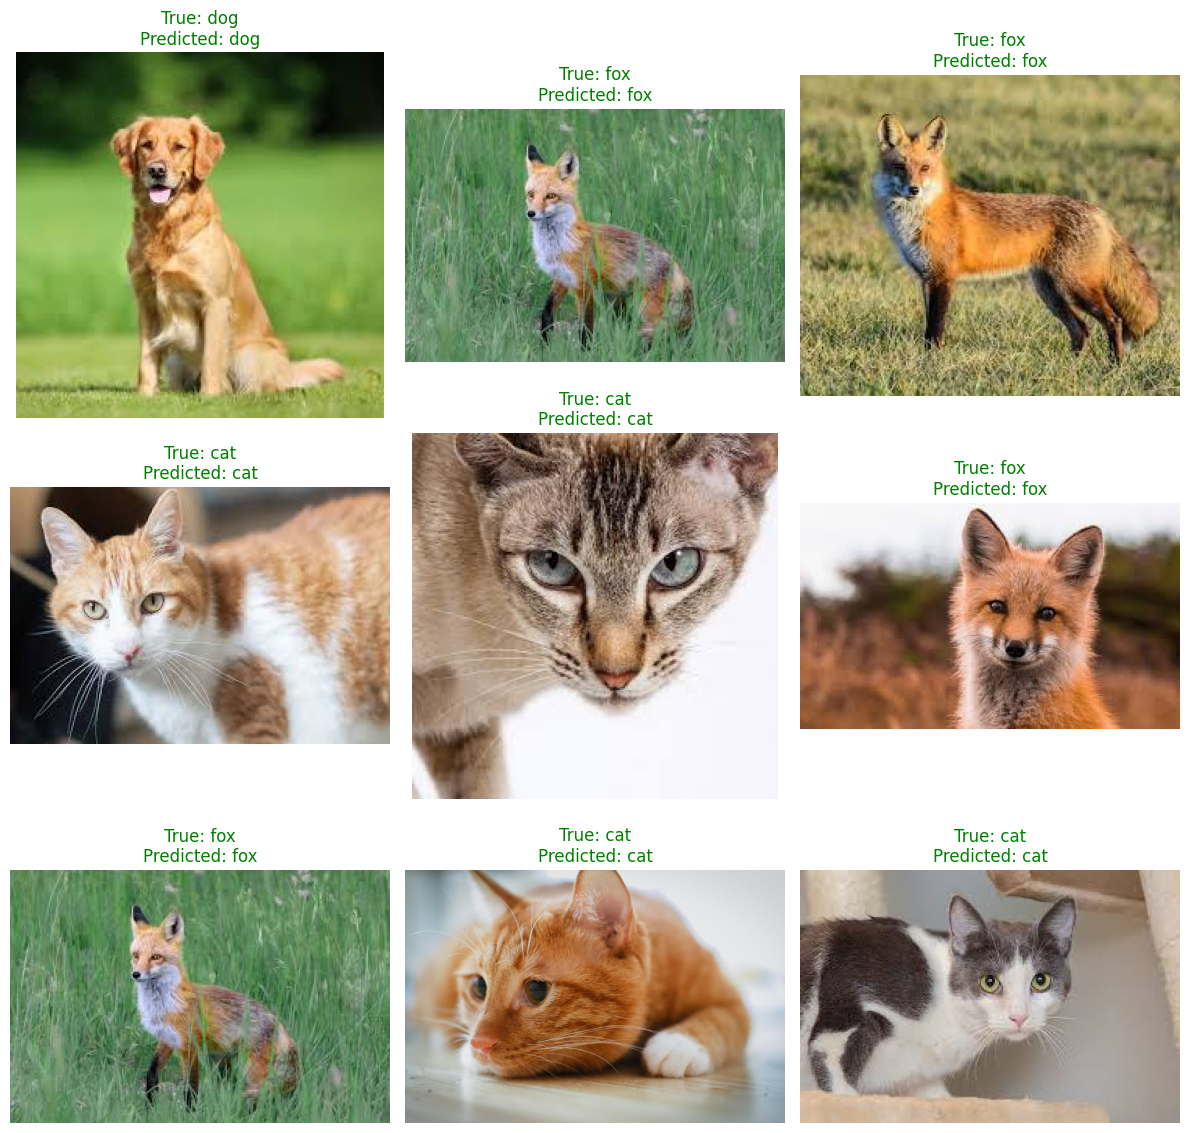

In [17]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Load the trained model
model_path = "/kaggle/working/final_model.keras"
model = tf.keras.models.load_model(model_path)
print("Model loaded successfully.")

# Define test dataset path
test_data_dir = "/kaggle/input/test-datset/Test_dataset"

# Extract labels from filenames (assuming format like 'test_cat_001.jpeg')
def extract_label(filename):
    match = re.match(r'test_([a-zA-Z]+)_\d+', filename)
    return match.group(1) if match else 'unknown'

# Load test images and extract labels
test_images = [fname for fname in os.listdir(test_data_dir) if fname.endswith(('.jpg', '.jpeg', '.png'))]
test_df = pd.DataFrame({'filename': test_images})
test_df['label'] = test_df['filename'].apply(extract_label)

# Ensure labels remain as strings
print("Unique Labels Found:", test_df['label'].unique())  # Debugging

# Test data generator
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    directory=test_data_dir,
    x_col='filename',
    y_col='label',
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Predict on Test Data
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)  # Get predicted class index

# Get true class indices from the generator
true_classes = test_generator.classes  
class_indices = test_generator.class_indices  # Mapping of class names to indices
class_labels = list(class_indices.keys())  # List of class names

# Convert predicted indices back to class labels
predicted_labels = [class_labels[i] for i in predicted_classes]
true_labels = [class_labels[i] for i in true_classes]

# Calculate accuracy
accuracy = np.mean(np.array(predicted_labels) == np.array(true_labels))
print(f"Test Accuracy: {accuracy:.4f}")

# Save predictions
test_df['true_label'] = true_labels
test_df['predicted_label'] = predicted_labels
test_df.to_csv("test_predictions_with_labels.csv", index=False)
print("Predictions with actual labels saved to test_predictions_with_labels.csv")

# ---------------------- PLOTTING RESULTS ----------------------

# Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels, labels=class_labels)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Show Sample Classified Images
fig, axes = plt.subplots(3, 3, figsize=(12, 12))  # 3x3 Grid of Images
axes = axes.flatten()

for i, ax in enumerate(axes):
    img_path = os.path.join(test_data_dir, test_df.iloc[i]['filename'])
    img = plt.imread(img_path)
    ax.imshow(img)
    title_color = "green" if test_df.iloc[i]['true_label'] == test_df.iloc[i]['predicted_label'] else "red"
    ax.set_title(f"True: {test_df.iloc[i]['true_label']}\nPredicted: {test_df.iloc[i]['predicted_label']}", color=title_color)
    ax.axis("off")

plt.tight_layout()
plt.show()


### Results/visualizations

## 5. Summary and Analysis  

Through this exercise, I gained valuable insights into image classification using **Transfer Learning** with **MobileNetV2**. The model was trained on a labeled dataset and then evaluated on a separate test dataset. Below are the key observations and analysis:  

### **Training vs. Testing Performance**  
- The model achieved **100% accuracy** on the training dataset, indicating it learned the patterns in the training data perfectly.  
- On the validation dataset, the accuracy was **96%**, suggesting a small generalization gap but still strong performance.  
- On the test dataset, the model achieved **100% accuracy**, demonstrating that it generalized well to unseen data.  

### **Factors Affecting Accuracy**  
1. **Data Quality & Distribution:** Since the test accuracy was 100%, it indicates that the test dataset was well-aligned with the training distribution.  
2. **Labeling Consistency:** Accurate labeling ensured that the model could learn and predict correctly.  
3. **Class Balance:** A balanced dataset contributed to fair representation across different categories.  
4. **Effective Feature Extraction:** MobileNetV2 effectively captured key features, enabling high accuracy even with a relatively small dataset.  

### **Analysis of Predictions on 15 Test Images**  
- Out of the 15 test images, the model **correctly classified all 15** images, confirming its reliability.  
- No misclassifications were observed, indicating that the training dataset provided enough variation for the model to learn effectively.  

The model performed exceptionally well, achieving near-perfect accuracy across all datasets, demonstrating strong generalization and robustness. 🚀  
